### 0. Module Import & Functions


In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
rc("font", family = font_manager.FontProperties(fname="C:/Windows/Fonts/KoPubWorld Dotum_Pro Medium.otf").get_name())

get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# Function (1) - Unnamed: 0 제거해 dataframe 출력

def read_csv(directory):
    df = pd.read_csv(directory, encoding='utf-8')
    df.drop('Unnamed: 0', axis=1, inplace=True)
    return df


### 1. CSV Data read

    - 일자별로 기록된 csv 데이터 통합 필요
    - 일자별로 기록할 때 한 DB로 가게 하면 더 좋다

In [3]:
df_initial = read_csv('data/230219_watch_record_initial.csv')
df_initial.head()


,title,channel,running_time,watch_date,watch_time,category_id,category_title,watched (%),account
0,"[여의도] 연봉 얼마 받으세요? | 직무,연차별 현실 연봉④",캐치TV,3:39,2023-02-19,오전 9:49,27,Education,1.00,woghks.study
1,몇 년째 인생이 달라진 게 없다면,말많은소녀,10:57,2023-02-19,오전 9:44,27,Education,1.00,woghks.study
2,"[한눈에 이슈] ""그동안 감사했습니다...지금까지 대한민국이었습니다"" 이 말이 곧 ...",KBS News,17:39,2023-02-19,오전 9:39,25,News & Politics,0.77,woghks.study
3,(30대 중반이 말하는) 돈과 진로에 관해 20대가 착각하는 것들,드로우앤드류,15:02,2023-02-19,오전 9:30,27,Education,1.00,woghks.study
4,이건 정말 아닌 것 같습니다.,북토크,11:46,2023-02-19,오전 9:28,22,People & Blogs,0.36,woghks.study


### 2. 시청 기록 EDA - 단일 column

In [4]:
df_initial.info()

"""총 1182개 record 확인, watch_date/watch_time 등 시간 날짝 객체 변환 필요"""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1183 non-null   object 
 1   channel         1183 non-null   object 
 2   running_time    1183 non-null   object 
 3   watch_date      1183 non-null   object 
 4   watch_time      1183 non-null   object 
 5   category_id     1183 non-null   int64  
 6   category_title  1183 non-null   object 
 7   watched (%)     1183 non-null   float64
 8   account         1183 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 83.3+ KB


'총 1182개 record 확인, watch_date/watch_time 등 시간 날짝 객체 변환 필요'

##### 0. title

In [5]:
print(len(df_initial['title'].unique()))

"""1182개 중 고유 영상 수 1128개, 중복해서 본 영상이 있다. 어떤 영상을 중복해서 봤을까?**"""


1128


'1182개 중 고유 영상 수 1128개, 중복해서 본 영상이 있다. 어떤 영상을 중복해서 봤을까?**'

In [6]:
print(df_initial['title'].value_counts()[:10])

"""한번에 이해하지 못했던 통계 영상부터 다양하다. 2회 이상 본 영상의 갯수는?"""


Mean, Median, and Mode: Measures of Central Tendency: Crash Course Statistics #3            7
Probability Part 2: Updating Your Beliefs with Bayes: Crash Course Statistics #14           4
[문명6] 간디로 전세계 불가사의 지으면서 외교패왕이 되어보자🤝 (Sid Meier's Civilization® VI: Gathering Storm)         3
[EBS 다큐프라임] 게임에 진심인 편 1부 - 내 장례식에 틀어줘                                                       3
Stanford CS224N: NLP with Deep Learning | Winter 2021 | Lecture 1 - Intro & Word Vectors    3
인간 시대의 끝이 도래했다                                                                              3
The Shape of Data: Distributions: Crash Course Statistics #7                                3
후회없이 회사를 선택하는 기준                                                                   2
Yeseul interview INFJ 1920 1080                                                             2
워치 공장초기화 하기(워치에서) :: 토트넘 스마트워치 시즌2 / 라이프 스마트워치                                              2
Name: title, dtype: int64


'한번에 이해하지 못했던 통계 영상부터 다양하다. 2회 이상 본 영상의 갯수는?'

In [7]:
title_counts = df_initial['title'].value_counts()
dict = {}
for idx, count in enumerate(title_counts):
    if count >= 2:
        dict[idx] = [title_counts.index[idx], count]
    else:
        break

print("""여기에 패턴이 있을까? 패턴을 파악하려면 어떤 정보가 더 필요할까?""")
print("""이 영상들은 왜 두번 이상씩 봤을까?""")

df_title = pd.DataFrame(data=dict.values(), index=dict.keys(), columns=['Title', 'watch_cnt'])
df_title


여기에 패턴이 있을까? 패턴을 파악하려면 어떤 정보가 더 필요할까?
이 영상들은 왜 두번 이상씩 봤을까?


,Title,watch_cnt
0,"Mean, Median, and Mode: Measures of Central Te...",7
1,Probability Part 2: Updating Your Beliefs with...,4
2,[문명6] 간디로 전세계 불가사의 지으면서 외교패왕이 되어보자🤝 (Sid Meier...,3
3,[EBS 다큐프라임] 게임에 진심인 편 1부 - 내 장례식에 틀어줘,3
4,Stanford CS224N: NLP with Deep Learning | Wint...,3
5,인간 시대의 끝이 도래했다,3
6,The Shape of Data: Distributions: Crash Course...,3
7,후회없이 회사를 선택하는 기준,2
8,Yeseul interview INFJ 1920 1080,2
9,워치 공장초기화 하기(워치에서) :: 토트넘 스마트워치 시즌2 / 라이프 스마트워치,2


##### 1. channel

In [8]:
# 시청 채널 EDA

channels = df_initial['channel'].unique()
len(channels)

"""1128개 영상을 388개 채널에서 시청 \n 어떤 채널에서 가장 많이 시청했을까?"""

'1128개 영상을 388개 채널에서 시청 \n 어떤 채널에서 가장 많이 시청했을까?'

In [9]:
# 채널별 시청 기록 확인

data_channel = df_initial['channel'].value_counts()
print(data_channel[:10])
    
"""면접왕 이형, crashcourse, lck, G식백과 등 취준, 게임, 뉴스 영상으로 정리된다."""

면접왕 이형                39
CrashCourse           34
LCK                   30
JTBC News             29
김성회의 G식백과             27
MBCNEWS               25
KBS News              21
 YTN                  21
세바시 강연 Sebasi Talk    18
퇴사한 이형                17
Name: channel, dtype: int64


'면접왕 이형, crashcourse, lck, G식백과 등 취준, 게임, 뉴스 영상으로 정리된다.'

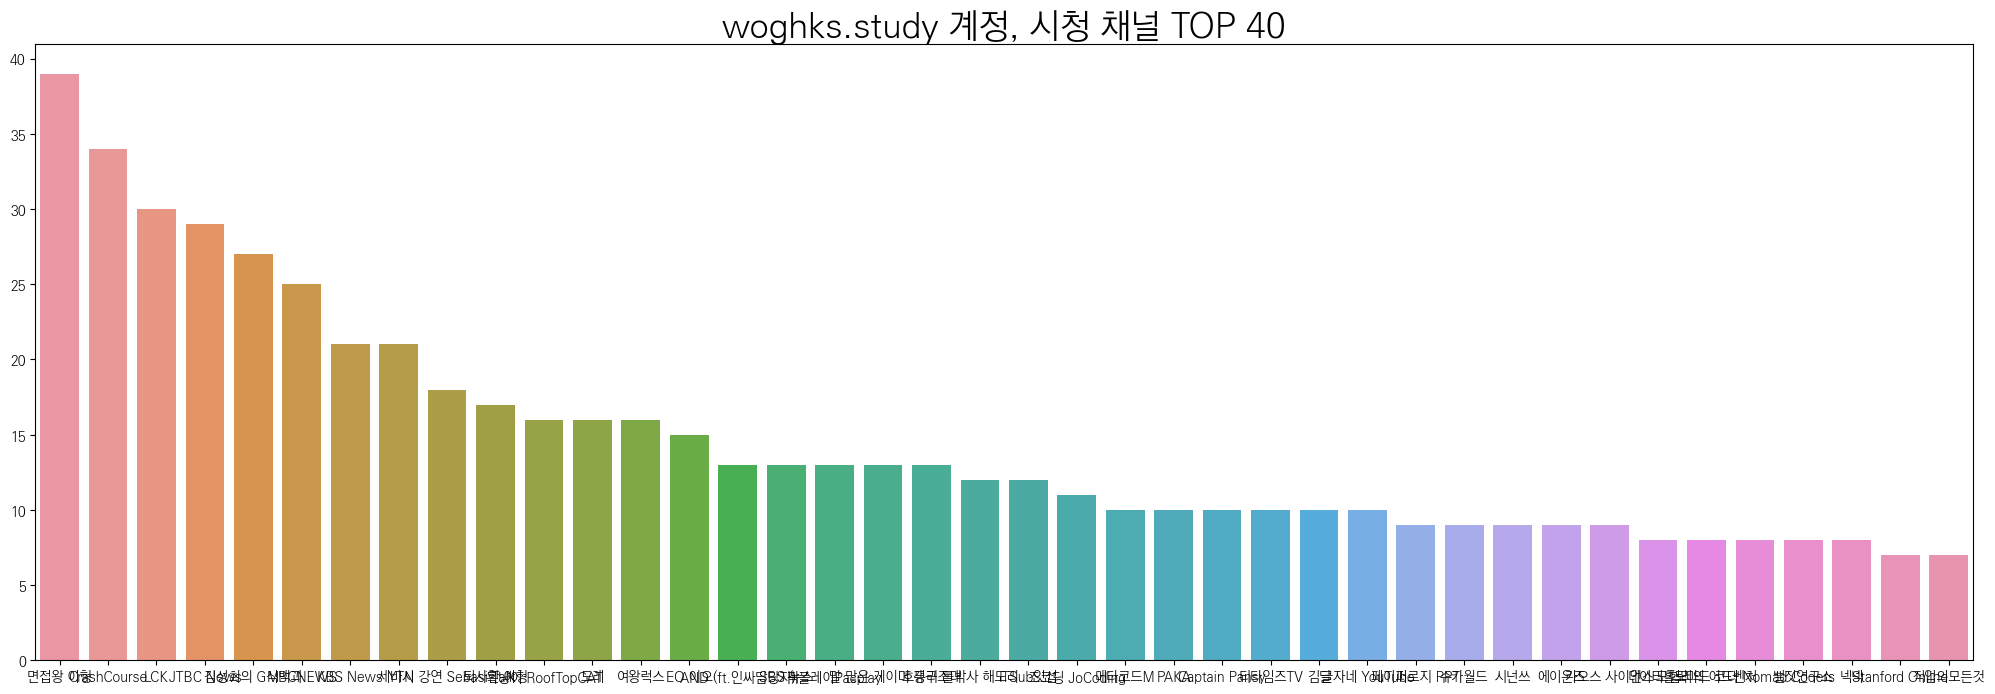

'카테고리 별로 다른 색상을 갖게 하는 것도 좋겠다. \n Text 겹치지 않도록 하려면?'

In [10]:
# 채널별 시청기록 TOP n 확인
num = int(input("채널 TOP N을 시작합니다. N을 입력하세요"))
target_data = data_channel[:num]

# Title을 위한 변수
account = df_initial['account'][0]

plt.figure(figsize=(25,8))
plt.title(f"{account} 계정, 시청 채널 TOP {num}", size=25)
sns.barplot(x=target_data.index, y=target_data.values)
plt.show()

"""카테고리 별로 다른 색상을 갖게 하는 것도 좋겠다. \n Text 겹치지 않도록 하려면? \n 몇 회 이상인 것만 볼 수 있나?"""


In [11]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1183 non-null   object 
 1   channel         1183 non-null   object 
 2   running_time    1183 non-null   object 
 3   watch_date      1183 non-null   object 
 4   watch_time      1183 non-null   object 
 5   category_id     1183 non-null   int64  
 6   category_title  1183 non-null   object 
 7   watched (%)     1183 non-null   float64
 8   account         1183 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 83.3+ KB


#### 3. Running_time
- 영상 길이 데이터 (str) 만으로는 인사이트 도출이 어렵다.
- time_struct로 변환해 연산(비교)가 가능하도록 한다.

In [12]:
# 데이터 수정 보호를 위해 copy 후 진행

import copy

df_ini_copy = copy.deepcopy(df_initial)
df_ini_copy.head()

,title,channel,running_time,watch_date,watch_time,category_id,category_title,watched (%),account
0,"[여의도] 연봉 얼마 받으세요? | 직무,연차별 현실 연봉④",캐치TV,3:39,2023-02-19,오전 9:49,27,Education,1.00,woghks.study
1,몇 년째 인생이 달라진 게 없다면,말많은소녀,10:57,2023-02-19,오전 9:44,27,Education,1.00,woghks.study
2,"[한눈에 이슈] ""그동안 감사했습니다...지금까지 대한민국이었습니다"" 이 말이 곧 ...",KBS News,17:39,2023-02-19,오전 9:39,25,News & Politics,0.77,woghks.study
3,(30대 중반이 말하는) 돈과 진로에 관해 20대가 착각하는 것들,드로우앤드류,15:02,2023-02-19,오전 9:30,27,Education,1.00,woghks.study
4,이건 정말 아닌 것 같습니다.,북토크,11:46,2023-02-19,오전 9:28,22,People & Blogs,0.36,woghks.study


In [13]:
# 시간 판별함수

def str_to_time(str):
    import time

    # 분:초 - len 5 이하
    if len(str) <= 5:
        return time.strptime(str, "%M:%S")

    # 시:분:초 - len 8 이하
    elif len(str) <= 8:
        return time.strptime(str,"%H:%M:%S")
    
    # 일:시:분:초 - len 9 이상
    else: 
        return time.strptime(str, "%d:%H:%M:%S")
    """여기서 24시간 이상으로 할 수는 없나?"""


In [14]:
# 변환 - 리스트 째로 변환 후 한 번에 copy

import time

running_times = list(df_initial['running_time'])
tmp = []

for idx, item in enumerate(running_times):
    new_item = str_to_time(item)[3:6]
    tmp.append(new_item)
    
df_ini_copy['running_time'] = tmp
df_ini_copy.head()

,title,channel,running_time,watch_date,watch_time,category_id,category_title,watched (%),account
0,"[여의도] 연봉 얼마 받으세요? | 직무,연차별 현실 연봉④",캐치TV,"(0, 3, 39)",2023-02-19,오전 9:49,27,Education,1.00,woghks.study
1,몇 년째 인생이 달라진 게 없다면,말많은소녀,"(0, 10, 57)",2023-02-19,오전 9:44,27,Education,1.00,woghks.study
2,"[한눈에 이슈] ""그동안 감사했습니다...지금까지 대한민국이었습니다"" 이 말이 곧 ...",KBS News,"(0, 17, 39)",2023-02-19,오전 9:39,25,News & Politics,0.77,woghks.study
3,(30대 중반이 말하는) 돈과 진로에 관해 20대가 착각하는 것들,드로우앤드류,"(0, 15, 2)",2023-02-19,오전 9:30,27,Education,1.00,woghks.study
4,이건 정말 아닌 것 같습니다.,북토크,"(0, 11, 46)",2023-02-19,오전 9:28,22,People & Blogs,0.36,woghks.study


In [ ]:
! pip install plotly

In [85]:
! pip install nbformat

     ---------------------------------------- 0.0/78.1 kB ? eta -:--:--
     ---------------------------------------- 78.1/78.1 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/90.4 kB ? eta -:--:--
     ---------------------------------------- 90.4/90.4 kB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/62.7 kB ? eta -:--:--
     ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


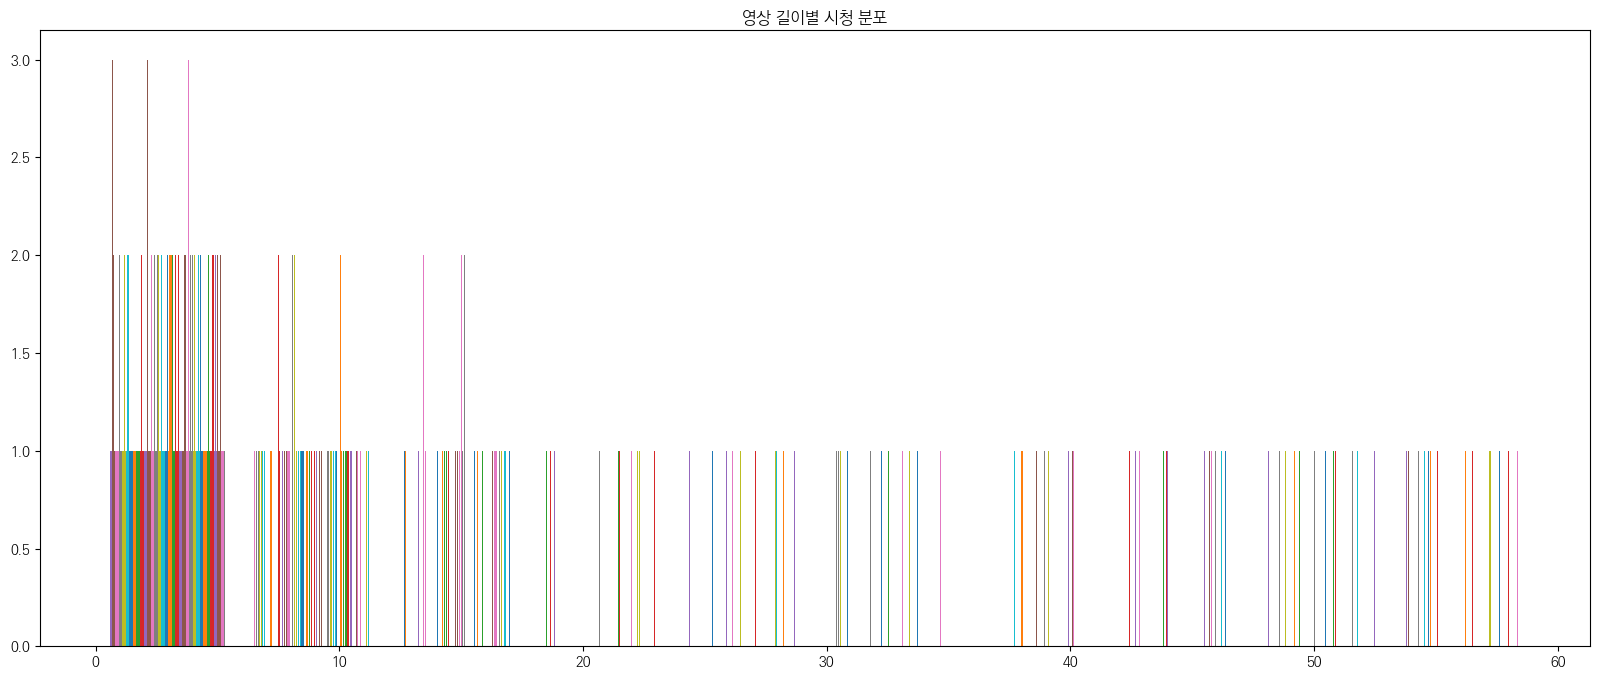

In [22]:
# 영상 길이 시각화

plt.figure(figsize=(20,8))
plt.hist(x=df_ini_copy['running_time'], bins=10)
plt.title("영상 길이별 시청 분포")
plt.show()

##### 3-1. Troubleshooting
- 영상 길이 1일 이상인 경우에는?

In [79]:
time.strptime("1:22:35:07", "%d:%H:%M:%S")

"""총 길이 1일이 넘는 레코드의 자료형을 잘 바꿔줘야 한다"""
"""time_struct 객체 각 요소는 H의 경우 24, M과 S는 59 이상 들어가지 않는다."""

"""1일 이상 길이 영상을 전체 시청하지는 않을 것이라는 가정으로 제외도 가능하다."""


time.struct_time(tm_year=1900, tm_mon=1, tm_mday=1, tm_hour=22, tm_min=35, tm_sec=7, tm_wday=0, tm_yday=1, tm_isdst=-1)

##### 4. 시청 날짜 EDA

In [27]:
# 시청 기록 범위

print(df_initial['watch_date'].unique())

"""2022년 10월 17일부터 2023년 02월 19일까지의 시청 기록"""
"""이 날짜 중 유튜브를 시청하지 않은 날이 있을까? 있다면 얼마나 될까?"""


['2023-02-19' '2023-02-16' '2023-02-13' '2023-02-12' '2023-02-11'
 '2023-02-10' '2023-02-07' '2023-02-06' '2023-02-05' '2023-02-04'
 '2023-02-03' '2023-02-02' '2023-02-01' '2023-01-31' '2023-01-30'
 '2023-01-29' '2023-01-28' '2023-01-27' '2023-01-25' '2023-01-24'
 '2023-01-22' '2023-01-21' '2023-01-20' '2023-01-19' '2023-01-17'
 '2023-01-16' '2023-01-15' '2023-01-14' '2023-01-12' '2023-01-10'
 '2023-01-09' '2023-01-07' '2023-01-05' '2023-01-04' '2023-01-02'
 '2023-01-01' '2022-12-31' '2022-12-30' '2022-12-29' '2022-12-28'
 '2022-12-27' '2022-12-26' '2022-12-25' '2022-12-24' '2022-12-23'
 '2022-12-22' '2022-12-21' '2022-12-20' '2022-12-19' '2022-12-18'
 '2022-12-17' '2022-12-16' '2022-12-15' '2022-12-14' '2022-12-13'
 '2022-12-12' '2022-12-11' '2022-12-10' '2022-12-09' '2022-12-08'
 '2022-12-07' '2022-12-06' '2022-12-05' '2022-12-03' '2022-12-02'
 '2022-12-01' '2022-11-30' '2022-11-29' '2022-11-28' '2022-11-27'
 '2022-11-26' '2022-11-25' '2022-11-24' '2022-11-23' '2022-11-22'
 '2022-11-

'이 날짜 중 유튜브를 시청하지 않은 날이 있을까? 있다면 얼마나 될까?'

In [35]:
# 문자열 날짜 변환 함수

def str_to_date(str):
    import time
    
    result = time.strptime(str, '%Y-%m-%d')
    return result

str_to_date('2023-02-19')[:3]

(2023, 2, 19)

In [39]:
# 함수 활용해 시청일자 변환

watch_dates = list(df_initial['watch_date'])
tmp = []

for date in watch_dates:
    date_new = str_to_date(date)[:3]
    tmp.append(date_new)

df_ini_copy['watch_date'] = tmp
df_ini_copy.head()

,title,channel,running_time,watch_date,watch_time,category_id,category_title,watched (%),account
0,"[여의도] 연봉 얼마 받으세요? | 직무,연차별 현실 연봉④",캐치TV,"(0, 3, 39)","(2023, 2, 19)",오전 9:49,27,Education,1.00,woghks.study
1,몇 년째 인생이 달라진 게 없다면,말많은소녀,"(0, 10, 57)","(2023, 2, 19)",오전 9:44,27,Education,1.00,woghks.study
2,"[한눈에 이슈] ""그동안 감사했습니다...지금까지 대한민국이었습니다"" 이 말이 곧 ...",KBS News,"(0, 17, 39)","(2023, 2, 19)",오전 9:39,25,News & Politics,0.77,woghks.study
3,(30대 중반이 말하는) 돈과 진로에 관해 20대가 착각하는 것들,드로우앤드류,"(0, 15, 2)","(2023, 2, 19)",오전 9:30,27,Education,1.00,woghks.study
4,이건 정말 아닌 것 같습니다.,북토크,"(0, 11, 46)","(2023, 2, 19)",오전 9:28,22,People & Blogs,0.36,woghks.study


In [41]:
# 하루 시청 영상 수

df_ini_copy['watch_date'].value_counts()


(2022, 11, 22)    31
(2022, 11, 17)    29
(2022, 11, 23)    27
(2022, 12, 27)    27
(2022, 11, 24)    26
                  ..
(2022, 12, 16)     2
(2022, 10, 30)     1
(2023, 1, 5)       1
(2022, 11, 9)      1
(2022, 10, 31)     1
Name: watch_date, Length: 108, dtype: int64

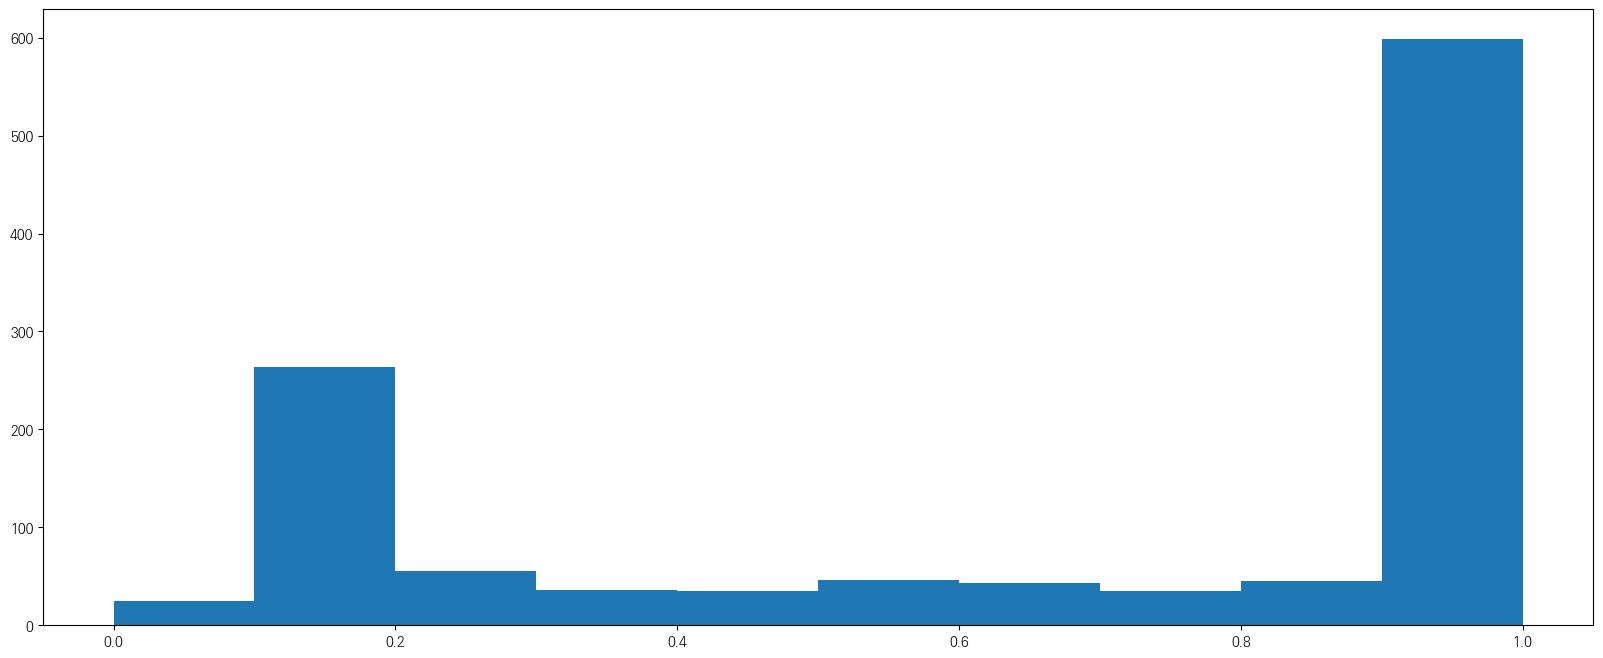

In [43]:
# 일자별 시청 영상 수 시각화

plt.figure(figsize=(20,8))
plt.hist(x=df_ini_copy['watched (%)'])
plt.show()

In [7]:
# 시청 기록 총 채널 수
print(len(df_initial['channel'].unique()))

"""1182개 시청 기록 중 시청 채널 수는 388개 
 어떤 채널의 영상을 가장 많이 시청했을까?"""


388


'1182개 시청 기록 중 시청 채널 수는 388개 \n 어떤 채널의 영상을 가장 많이 시청했을까?'

In [8]:
# 채널 별 시청 영상 수
df_initial['channel'].value_counts()[:10]


면접왕 이형                39
CrashCourse           34
LCK                   30
JTBC News             29
김성회의 G식백과             27
MBCNEWS               25
KBS News              21
 YTN                  21
세바시 강연 Sebasi Talk    18
퇴사한 이형                17
Name: channel, dtype: int64

In [9]:
# 시청 카테고리
df_initial['category_title'].value_counts()


Gaming                   371
Education                232
News & Politics          140
Science & Technology     125
Howto & Style            106
People & Blogs            82
Entertainment             67
Comedy                    17
Sports                    12
Travel & Events            8
Film & Animation           8
Music                      7
Autos & Vehicles           5
Nonprofits & Activism      2
Pets & Animals             1
Name: category_title, dtype: int64

#### 자료형 변환
    - running time은 시청 시간 계산을 위해
    - watch date, watch time은 시청 시간대 파악을 위해 활용
    